<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/Neural_Network_on_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **Neural Network on Iris Dataset**
# A neural network is like teaching a child to recognize patterns — show it enough examples, and it learns to see what you see."


---



In [34]:
# STEP 1: Install and Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from rich import print

In [35]:
# STEP 2: Load the Data
url = "https://raw.githubusercontent.com/lovnishverma/datasets/refs/heads/main/iriswithheaders.csv"
data = pd.read_csv(url)

In [36]:
print("First 5 rows of dataset:")
print(data.head())

First 5 rows of dataset:

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [37]:
# STEP 3: Separate Features and Target
X = data.drop("species", axis=1).values
y = data["species"].values

In [38]:
# Encode labels (setosa, versicolor, virginica -> 0,1,2)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convert to one-hot encoding for neural network
y_onehot = to_categorical(y_encoded)

In [39]:
# STEP 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42
)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 120

Testing samples: 30

In [40]:
# STEP 5: Build a Neural Network Model

model = Sequential([
    Input(shape=(4,)),              # Define input
    Dense(10, activation="relu"),   # hidden layer with 10 neurons
    Dense(8, activation="relu"),    # another hidden layer
    Dense(3, activation="softmax")  # output layer (3 classes)
])

In [41]:
# STEP 6: Compile the Model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [42]:
# STEP 7: Train the Model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=5, verbose=1)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4193 - loss: 2.2368 - val_accuracy: 0.3333 - val_loss: 2.1626
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3406 - loss: 1.9475 - val_accuracy: 0.3333 - val_loss: 1.7226
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3129 - loss: 1.6476 - val_accuracy: 0.3333 - val_loss: 1.3948
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3717 - loss: 1.2515 - val_accuracy: 0.3333 - val_loss: 1.1764
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3000 - loss: 1.1524 - val_accuracy: 0.3333 - val_loss: 1.0296
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3804 - loss: 0.9491 - val_accuracy: 0.4000 - val_loss: 0.9162
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5354 - loss: 0.8569 - val_accuracy: 0.6333 - val_loss: 0.8310
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7067 - loss: 0.7460 - val_accuracy: 0.6333 - val_loss

In [43]:
# STEP 8: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.2f}")

Test Accuracy: 0.93

In [44]:
# Get predictions from the model
y_pred = model.predict(X_test)

# Convert one-hot encoded back to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes,
                               target_names=encoder.classes_)
print("\nClassification Report:\n")
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Classification Report:

precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.89      0.89         9
   virginica       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

In [45]:
# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Put into a DataFrame for nice tabular view
cm_df = pd.DataFrame(cm,
                     index=encoder.classes_,
                     columns=encoder.classes_)

print("\nConfusion Matrix:\n")
print(cm_df)

Confusion Matrix:

setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           8          1
virginica        0           1         10

**Make Predictions**

In [46]:
# STEP 9: Make Predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print("\nFirst 10 Predictions vs True Labels:")
print("Predicted:", predicted_classes[:10])
print("True     :", true_classes[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


First 10 Predictions vs True Labels:

Predicted: [1 0 2 1 1 0 1 2 2 1]

True     : [1 0 2 1 1 0 1 2 1 1]

In [47]:
# Single prediction
sample = np.array([[5.4, 3.7, 1.5, 0.2]])
prediction = model.predict(sample)

# Get class index (highest probability)
predicted_class = np.argmax(prediction)

# Get species name from encoder
predicted_species = encoder.inverse_transform([predicted_class])

print("Raw prediction probabilities:", prediction)
print("Predicted class index:", predicted_class)
print("Predicted species:", predicted_species[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Raw prediction probabilities: [[9.9662209e-01 3.3779542e-03 6.3280084e-12]]

Predicted class index: 0

Predicted species: setosa

**or this way**

In [48]:
sample = np.array([[5.4, 3.7, 1.5, 0.2]])
prediction = model.predict(sample)

species = ["setosa", "versicolor", "virginica"]
print("Predicted species:", species[prediction.argmax()])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Predicted species: setosa



---



**Accuracy/Loss Graphs**

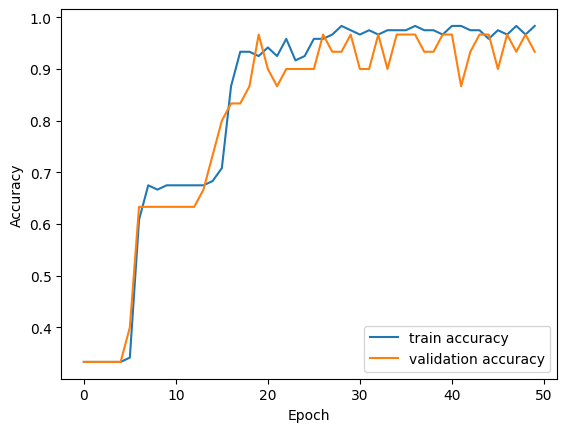

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Confusion Matrix**

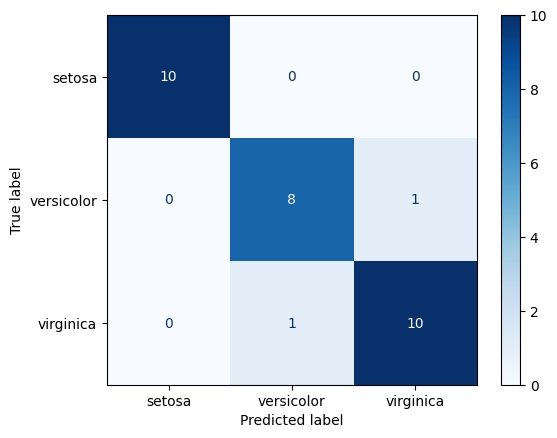

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()



---



# **Save the Model**

In [51]:
# Save as HDF5 file
model.save("iris_model.h5")
print("Model saved!")

Model saved!

**or with the newer format:**

In [52]:
model.save("iris_model.keras")   # recommended

**Load the Model**

In [53]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("iris_model.keras")
print("Model loaded!")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model loaded!

**Predict with Loaded Model**

In [54]:
# Example flower
sample = np.array([[5.4, 3.7, 1.5, 0.2]])

prediction = loaded_model.predict(sample)
species = ["setosa", "versicolor", "virginica"]

print("Predicted species:", species[prediction.argmax()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Predicted species: setosa

In [55]:
print("[yellow on black]We understand the rules of how neural networks learn, but not always the reasons behind the clever patterns they discover.[/yellow on black]")

We understand the rules of how neural networks learn, but not always the reasons behind the clever patterns they 
discover.



---



# **Quick Recap without test/train split**

**1. Load Data**

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical

# Load dataset
url = "https://raw.githubusercontent.com/lovnishverma/datasets/refs/heads/main/iriswithheaders.csv"
data = pd.read_csv(url)

X = data.drop("species", axis=1).values
y = data["species"].values

**2. Encode Target Labels**

In [57]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)   # convert to one-hot

**3. Build Neural Network**

In [58]:
model = Sequential([
    Input(shape=(4,)),              # define input
    Dense(10, activation="relu"),   # hidden layer with 10 neurons
    Dense(8, activation="relu"),    # another hidden layer
    Dense(3, activation="softmax")  # output layer (3 classes)
])

**4. Compile Model**

In [59]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

**5. Train on All Data**

In [60]:
history = model.fit(X, y_onehot, epochs=50, batch_size=5, verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3264 - loss: 1.3631
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3508 - loss: 1.0798 
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3294 - loss: 0.9782 
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3525 - loss: 0.9405 
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3145 - loss: 0.9081 
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3874 - loss: 0.8672 
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.8405
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6806 - loss: 0.8134
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7095 - loss: 0.8061 
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6909 - loss: 0.7923 
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6235 - loss: 0.7886 
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6

**6. Evaluate on Same Data**

In [61]:
loss, accuracy = model.evaluate(X, y_onehot, verbose=0)
print(f"\nAccuracy on full dataset: {accuracy:.2f}")

Accuracy on full dataset: 0.97

97% accuracy means the model correctly predicts the species for 97 out of every 100 samples it sees.

**Why this can be misleading**

* Since the model was trained and tested on the same data, it may have just “memorized” some patterns.

* In real ML, we want to know: “How well does it do on new, unseen flowers?”
That’s why we usually do a train/test split like we did before.

**7. Predict Example**

In [62]:
sample = np.array([[5.4, 3.7, 1.5, 0.2]])
prediction = model.predict(sample)
species = ["setosa", "versicolor", "virginica"]
print("Predicted species:", species[prediction.argmax()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Predicted species: setosa

**8. Save Model**

In [63]:
model.save("iris_model.keras")

**9. Load Saved Model**

In [64]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("iris_model.keras")
print("Model loaded!")

Model loaded!

**10. Predict From Saved Model**

In [65]:
# Example flower
sample = np.array([[5.4, 3.7, 1.5, 0.2]])

prediction = loaded_model.predict(sample)
species = ["setosa", "versicolor", "virginica"]

print("Predicted species:", species[prediction.argmax()])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Predicted species: setosa



---



In [66]:
# @title
from rich.console import Console
from rich.panel import Panel
from rich.align import Align

console = Console()

content = Align.center(
    "[bold cyan]© Lovnish Verma 2025[/bold cyan]\nAll Rights Reserved",
    vertical="middle"
)

console.print(
    Panel(
        content,
        border_style="green",
        title="Copyright",
        subtitle="Neural Network Tutorial",
        expand=True
    )
)

╭─────────────────────────────────────────────────── Copyright ───────────────────────────────────────────────────╮
│                                              © Lovnish Verma 2025                                               │
│                                              All Rights Reserved                                                │
╰──────────────────────────────────────────── Neural Network Tutorial ────────────────────────────────────────────╯